Before you turn this lab in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
DRIVER = "Srini"
NAVIGATOR = "Jon"

# Optimization II Lab

Welcome to the optimization II lab! By the end of this lab you will have

- Performed optimization on a deep learning model with several different optimizers
- Visualized optimizer dynamics via TensorBoard
- Visualized optimizer performance via SacredBoard

Let's get started!

# Unit Test Variables

The following code defines variables that will be used in subsequent unit tests. Do not attempt to redefine any of these variables throughout the notebook!

In [2]:
from IPython.display import HTML

def passed():
    print('✅')

## Task

- Define a convolutional neural network trainer `CNNTrainer` in `trainers.py`

## Remarks

- You can either fill in the code below or directly edit `trainers.py`

In [14]:
from trainer import Trainer

class CNNTrainer(Trainer):
    """Convolutional Neural Network Classifier"""

    def build_model(self):
        from keras.models import Sequential
        from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten

        model = Sequential()
        model.add(Conv2D(filters = 1, 
                         kernel_size = (5,5),
                         strides = (1,1),
                         input_shape = (28,28,1)))
        model.add(Dense(units=512, activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(activation='softmax', units=10))
        model.summary()
        self.model = model

import trainers
trainers.CNNTrainer = CNNTrainer

# `CNNTrainer` Tests

In [15]:
import numpy as np
from trainers import CNNTrainer

cnn = CNNTrainer(config={})
cnn.load_data()
cnn.build_model()

nb_conv = len([layer for layer in cnn.model.layers if layer.name.startswith('conv')])
assert nb_conv >= 1
assert cnn.model.input_shape == (None, 28, 28, 1)
assert cnn.model.output_shape == (None, 10)
X_ = np.random.randn(16, 28, 28, 1)
y_pred = cnn.model.predict_classes(X_, verbose=0)
assert np.all(0 <= y_pred) and np.all(y_pred < 10)

passed()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 1)         26        
_________________________________________________________________
dense_3 (Dense)              (None, 24, 24, 512)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 512)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                737290    
Total params: 738,340.0
Trainable params: 738,340.0
Non-trainable params: 0.0
_________________________________________________________________
✅


In [17]:
CNNTrainer

__main__.CNNTrainer

## Task

- Optimize your `CNNTrainer` model with every optimizer in keras with the exception of `TFOptimizer`

## Suggestion

- Start with a simple model like `MLRTrainer` and only consider a small number of training examples so you can debug quickly until you're sure everything is working correctly and them experiment with larger slower `CNNTrainer`

## Requirement

- Keep the sacred [Mongo Observer](http://sacred.readthedocs.io/en/latest/observers.html#mongo-observer) so you can view the results afterward in [sacredboard](https://github.com/chovanecm/sacredboard)

In [16]:
from train import ex
import keras
import keras.backend as K
from sacred.observers import MongoObserver
mongo_observer = MongoObserver.create()
ex.observers.append(mongo_observer)

import keras.backend as K
for trainer in ['CNNTrainer']:
    run = ex.run(config_updates={'trainer': trainer})
    K.clear_session()

INFO - train - Running command 'main'
INFO - train - Started run with ID "1"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 1)         26        
_________________________________________________________________
dense_5 (Dense)              (None, 24, 24, 512)       1024      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 512)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                737290    
Total params: 738,340.0
Trainable params: 738,340.0
Non-trainable params: 0.0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #  

INFO - tensorflow - Summary name conv2d_3/kernel:0 is illegal; using conv2d_3/kernel_0 instead.


INFO:tensorflow:Summary name conv2d_3/bias:0 is illegal; using conv2d_3/bias_0 instead.


INFO - tensorflow - Summary name conv2d_3/bias:0 is illegal; using conv2d_3/bias_0 instead.


INFO:tensorflow:Summary name dense_5/kernel:0 is illegal; using dense_5/kernel_0 instead.


INFO - tensorflow - Summary name dense_5/kernel:0 is illegal; using dense_5/kernel_0 instead.


INFO:tensorflow:Summary name dense_5/bias:0 is illegal; using dense_5/bias_0 instead.


INFO - tensorflow - Summary name dense_5/bias:0 is illegal; using dense_5/bias_0 instead.


INFO:tensorflow:Summary name dense_6/kernel:0 is illegal; using dense_6/kernel_0 instead.


INFO - tensorflow - Summary name dense_6/kernel:0 is illegal; using dense_6/kernel_0 instead.


INFO:tensorflow:Summary name dense_6/bias:0 is illegal; using dense_6/bias_0 instead.


INFO - tensorflow - Summary name dense_6/bias:0 is illegal; using dense_6/bias_0 instead.


Epoch 1/10
1000/1000 [==============================] - 7s - loss: 2.2485 - acc: 0.3590          

INFO - train - Result: 0.4333058613538742
INFO - train - Completed after 0:01:18


## Task

- Visualize optimizer dynamics with TensorBoard

## Requirements

- Select out plots which track only training loss during your experiment runs in TensorBoard with an appropriate regex (e.g. `loss`)
- Take a screenshot
- Load it into a `IPython.display.Image` object called `tensorboard_screenshot`
- Display it

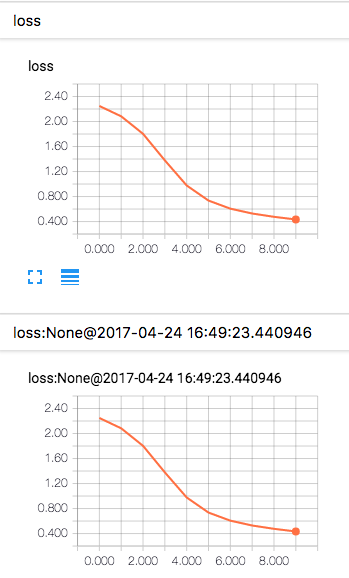

In [23]:
from IPython.display import Image, display
tensorboard_screenshot = Image("tensorboard_screenshot.png")
display(tensorboard_screenshot)

# TensorBoard Screenshot Test

In [19]:
import IPython

assert type(tensorboard_screenshot) == IPython.core.display.Image
assert 'PNG' in str(tensorboard_screenshot.data) or 'JPG' in str(tensorboard_screenshot.data)

passed()

✅


## Task

- Visualize optimizer performance with sacredboard

## Requirements

- Sort the optimizer runs in sacredboard by loss
- Take a screenshot
- Load it into a `IPython.display.Image` object called `sacredboard_screenshot`
- Display it

In [26]:
for opt in ['Adam', 'Adagrad', 'RMPProp', 'sgd']:
    for trainer in ['CNNTrainer']:
        run = ex.run(config_updates={'trainer': trainer, 'optimizer': opt})
        K.clear_session()

INFO - train - Running command 'main'
INFO - train - Started run with ID "2"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 1)         26        
_________________________________________________________________
dense_1 (Dense)              (None, 24, 24, 512)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 512)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                737290    
Total params: 738,340.0
Trainable params: 738,340.0
Non-trainable params: 0.0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #  

INFO - tensorflow - Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.


INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.


INFO - tensorflow - Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.


INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.


INFO - tensorflow - Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.


INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.


INFO - tensorflow - Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.


INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.


INFO - tensorflow - Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.


INFO:tensorflow:Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.


INFO - tensorflow - Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.


Epoch 1/10
1000/1000 [==============================] - 7s - loss: 2.2641 - acc: 0.3440     

INFO - train - Result: 0.48062656331062314
INFO - train - Completed after 0:01:13


INFO - train - Running command 'main'
INFO - train - Started run with ID "3"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 1)         26        
_________________________________________________________________
dense_1 (Dense)              (None, 24, 24, 512)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 512)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                737290    
Total params: 738,340.0
Trainable params: 738,340.0
Non-trainable params: 0.0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #  

INFO - tensorflow - Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.


INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.


INFO - tensorflow - Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.


INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.


INFO - tensorflow - Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.


INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.


INFO - tensorflow - Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.


INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.


INFO - tensorflow - Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.


INFO:tensorflow:Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.


INFO - tensorflow - Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.


Epoch 1/10
1000/1000 [==============================] - 7s - loss: 2.2251 - acc: 0.3570      

INFO - train - Result: 0.42055977606773376
INFO - train - Completed after 0:01:10


INFO - train - Running command 'main'
INFO - train - Started run with ID "4"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 1)         26        
_________________________________________________________________
dense_1 (Dense)              (None, 24, 24, 512)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 512)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                737290    
Total params: 738,340.0
Trainable params: 738,340.0
Non-trainable params: 0.0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #  

INFO - tensorflow - Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.


INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.


INFO - tensorflow - Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.


INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.


INFO - tensorflow - Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.


INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.


INFO - tensorflow - Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.


INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.


INFO - tensorflow - Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.


INFO:tensorflow:Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.


INFO - tensorflow - Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.


Epoch 1/10
1000/1000 [==============================] - 7s - loss: 2.2803 - acc: 0.3370     

INFO - train - Result: 0.475884952545166
INFO - train - Completed after 0:01:13


INFO - train - Running command 'main'
INFO - train - Started run with ID "5"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 1)         26        
_________________________________________________________________
dense_1 (Dense)              (None, 24, 24, 512)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 512)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                737290    
Total params: 738,340.0
Trainable params: 738,340.0
Non-trainable params: 0.0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #  

INFO - tensorflow - Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.


INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.


INFO - tensorflow - Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.


INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.


INFO - tensorflow - Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.


INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.


INFO - tensorflow - Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.


INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.


INFO - tensorflow - Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.


INFO:tensorflow:Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.


INFO - tensorflow - Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.


Epoch 1/10
1000/1000 [==============================] - 6s - loss: 2.2319 - acc: 0.3380     

INFO - train - Result: 0.4253781628608704
INFO - train - Completed after 0:01:13


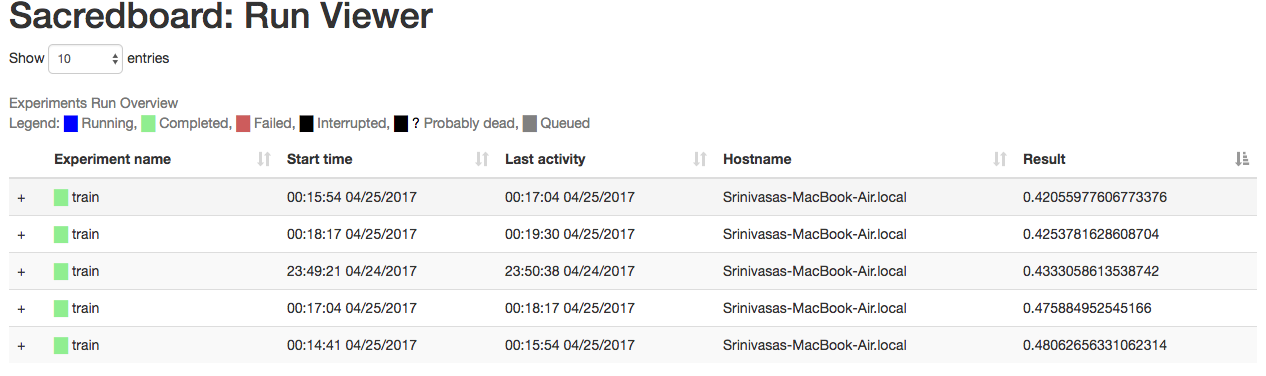

In [28]:
sacredboard_screenshot = Image("sacredboard_screenshot.png")
display(sacredboard_screenshot)

# SacredBoard Screenshot Test

In [29]:
import IPython

assert type(sacredboard_screenshot) == IPython.core.display.Image
assert 'PNG' in str(sacredboard_screenshot.data) or 'JPG' in str(sacredboard_screenshot.data)

passed()

✅


## Question

- Which optimizer did you find worked best? Does that surprise you? If so, why?

- Adagrad performed the best with 0.42055 loss

## Question

- What is the intution behind that optimitzer?

- Since Adagrad performes larger updates for infrequently updated parameter and smaller updates for frequent parameters. It suits well for MNIST data which is also sparse.

# Challenge Activities

- Tune the hyperparameters of the best optimizer
- Do the same thing in TensorFlow